<a href="https://colab.research.google.com/github/shubhs27/500107856_Predictive-Analytics-Lab/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Metrics:
Mean Squared Error: 91775324.70
R-squared: 0.98


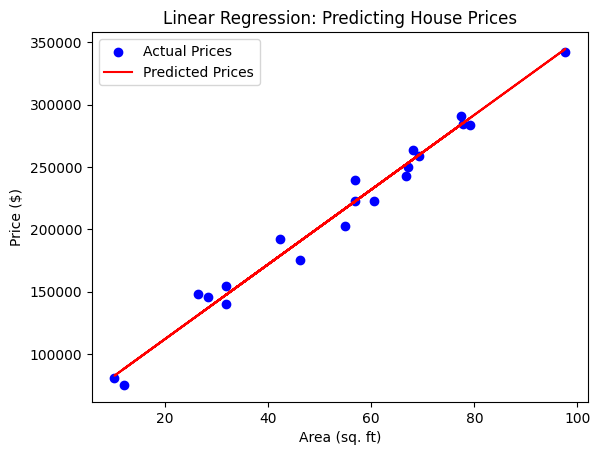


Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



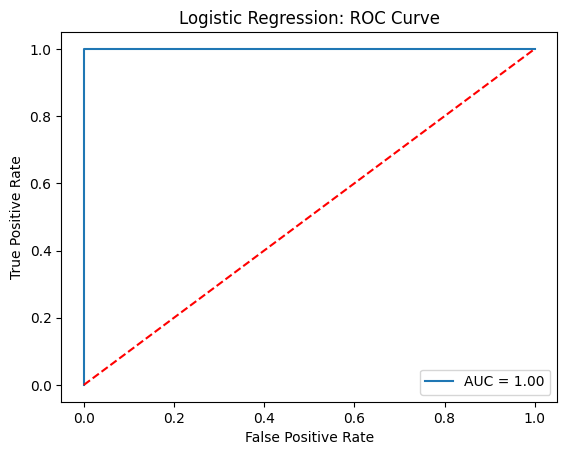

In [ ]:

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, roc_curve, auc

# Linear Regression Example: Predicting House Prices
# Create dummy data
np.random.seed(0)
X_linear = np.random.rand(100, 1) * 100  # Independent variable: Area in sq. ft
y_linear = 50000 + (X_linear * 3000) + np.random.randn(100, 1) * 10000  # Price in $

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

# Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions and Metrics
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.title("Linear Regression: Predicting House Prices")
plt.xlabel("Area (sq. ft)")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

# Logistic Regression Example: Predicting Loan Default
# Create dummy data
np.random.seed(0)
X_logistic = np.random.rand(100, 1) * 100  # Credit score
y_logistic = (X_logistic > 50).astype(int).ravel()  # Default (0: No, 1: Yes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions and Metrics
y_pred = logistic_model.predict(X_test)
y_prob = logistic_model.predict_proba(X_test)[:, 1]
print("\nLogistic Regression Metrics:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.title("Logistic Regression: ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()